In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import matplotlib

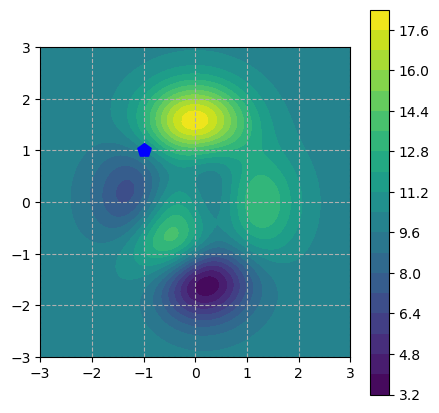

In [3]:
# Plot the landscape

def func(x):
    """Calculate the obj func"""
    res = (
        3 * (1 - x[0]) ** 2 * np.exp(-(x[0] ** 2) - (x[1] + 1) ** 2)
        - 10 * (x[0] / 5 - x[0] ** 3 - x[1] ** 5) * np.exp(-(x[0] ** 2) - x[1] ** 2)
        - (np.exp(-((x[0] + 1) ** 2) - x[1] ** 2)) / 3
        + 10
    )
    return res.squeeze()


def func_grad(x):
    """gradient"""
    grad_x1 = (
        -6 * x[0] * (1 - x[0]) ** 2 * np.exp(-(x[0] ** 2) - (x[1] + 1) ** 2)
        + 2
        * x[0]
        * (-10 * x[0] ** 3 + 2 * x[0] - 10 * x[1] ** 5)
        * np.exp(-(x[0] ** 2) - x[1] ** 2)
        - (2 - 30 * x[0] ** 2) * np.exp(-(x[0] ** 2) - x[1] ** 2)
        - (-2 * x[0] - 2) * np.exp(-(x[1] ** 2) - (x[0] + 1) ** 2) / 3
        + 3 * (2 * x[0] - 2) * np.exp(-(x[0] ** 2) - (x[1] + 1) ** 2)
    )

    grad_x2 = (
        50 * x[1] ** 4 * np.exp(-(x[0] ** 2) - x[1] ** 2)
        + 2
        * x[1]
        * (-10 * x[0] ** 3 + 2 * x[0] - 10 * x[1] ** 5)
        * np.exp(-(x[0] ** 2) - x[1] ** 2)
        + 2 * x[1] * np.exp(-(x[1] ** 2) - (x[0] + 1) ** 2) / 3
        + 3 * (1 - x[0]) ** 2 * (-2 * x[1] - 2) * np.exp(-(x[0] ** 2) - (x[1] + 1) ** 2)
    )

    return np.array([grad_x1, grad_x2])


def func_hess(x):
    "Hessian"
    hessian = np.zeros([2, 2])

    hessian[0, 0] = (
        12 * x[0] ** 2 * (1 - x[0]) ** 2 * np.exp(-x[0] ** 2 - (x[1] + 1) ** 2)
        - 4
        * x[0] ** 2
        * (-10 * x[0] ** 3 + 2 * x[0] - 10 * x[1] ** 5)
        * np.exp(-x[0] ** 2 - x[1] ** 2)
        + 4 * x[0] * (2 - 30 * x[0] ** 2) * np.exp(-x[0] ** 2 - x[1] ** 2)
        - 12 * x[0] * (2 * x[0] - 2) * np.exp(-x[0] ** 2 - (x[1] + 1) ** 2)
        + 60 * x[0] * np.exp(-x[0] ** 2 - x[1] ** 2)
        - 6 * (1 - x[0]) ** 2 * np.exp(-x[0] ** 2 - (x[1] + 1) ** 2)
        - (-2 * x[0] - 2) ** 2 * np.exp(-x[1] ** 2 - (x[0] + 1) ** 2) / 3
        + 2
        * (-10 * x[0] ** 3 + 2 * x[0] - 10 * x[1] ** 5)
        * np.exp(-x[0] ** 2 - x[1] ** 2)
        + 6 * np.exp(-x[0] ** 2 - (x[1] + 1) ** 2)
        + 2 * np.exp(-x[1] ** 2 - (x[0] + 1) ** 2) / 3
    ).squeeze()

    hessian[0, 1] = (
        -100 * x[0] * x[1] ** 4 * np.exp(-x[0] ** 2 - x[1] ** 2)
        - 4
        * x[0]
        * x[1]
        * (-10 * x[0] ** 3 + 2 * x[0] - 10 * x[1] ** 5)
        * np.exp(-x[0] ** 2 - x[1] ** 2)
        - 6
        * x[0]
        * (1 - x[0]) ** 2
        * (-2 * x[1] - 2)
        * np.exp(-x[0] ** 2 - (x[1] + 1) ** 2)
        + 2 * x[1] * (2 - 30 * x[0] ** 2) * np.exp(-x[0] ** 2 - x[1] ** 2)
        + 2 * x[1] * (-2 * x[0] - 2) * np.exp(-x[1] ** 2 - (x[0] + 1) ** 2) / 3
        + 3 * (2 * x[0] - 2) * (-2 * x[1] - 2) * np.exp(-x[0] ** 2 - (x[1] + 1) ** 2)
    ).squeeze()

    hessian[1, 0] = (
        -100 * x[0] * x[1] ** 4 * np.exp(-x[0] ** 2 - x[1] ** 2)
        - 4
        * x[0]
        * x[1]
        * (-10 * x[0] ** 3 + 2 * x[0] - 10 * x[1] ** 5)
        * np.exp(-x[0] ** 2 - x[1] ** 2)
        - 6
        * x[0]
        * (1 - x[0]) ** 2
        * (-2 * x[1] - 2)
        * np.exp(-x[0] ** 2 - (x[1] + 1) ** 2)
        + 2 * x[1] * (2 - 30 * x[0] ** 2) * np.exp(-x[0] ** 2 - x[1] ** 2)
        + 2 * x[1] * (-2 * x[0] - 2) * np.exp(-x[1] ** 2 - (x[0] + 1) ** 2) / 3
        + 3 * (2 * x[0] - 2) * (-2 * x[1] - 2) * np.exp(-x[0] ** 2 - (x[1] + 1) ** 2)
    ).squeeze()

    hessian[1, 1] = (
        -200 * x[1] ** 5 * np.exp(-x[0] ** 2 - x[1] ** 2)
        + 200 * x[1] ** 3 * np.exp(-x[0] ** 2 - x[1] ** 2)
        - 4
        * x[1] ** 2
        * (-10 * x[0] ** 3 + 2 * x[0] - 10 * x[1] ** 5)
        * np.exp(-x[0] ** 2 - x[1] ** 2)
        - 4 * x[1] ** 2 * np.exp(-x[1] ** 2 - (x[0] + 1) ** 2) / 3
        + 3
        * (1 - x[0]) ** 2
        * (-2 * x[1] - 2) ** 2
        * np.exp(-x[0] ** 2 - (x[1] + 1) ** 2)
        - 6 * (1 - x[0]) ** 2 * np.exp(-x[0] ** 2 - (x[1] + 1) ** 2)
        + 2
        * (-10 * x[0] ** 3 + 2 * x[0] - 10 * x[1] ** 5)
        * np.exp(-x[0] ** 2 - x[1] ** 2)
        + 2 * np.exp(-x[1] ** 2 - (x[0] + 1) ** 2) / 3
    ).squeeze()

    return hessian


# Plot Contour
x1 = np.linspace(-3, 3, 101)
x2 = np.linspace(-3, 3, 101)
X1, X2 = np.meshgrid(x1, x2)

f = np.zeros_like(X1)
for i in range(len(x2)):
    for j in range(len(x1)):
        f[i, j] = func(np.array([X1[i, j], X2[i, j]]))


x_ini = np.array([[-1], [1]])

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
img = ax.contourf(X1, X2, f, 20, cmap="viridis")
ax.scatter(x_ini[0], x_ini[1], s=100, color='b', marker='p', zorder=99)

ax.grid(ls="--")
ax.axis("scaled")
fig.colorbar(img, ax=ax)

In [6]:
def plot_result(x_set):
    x1 = np.vstack(list(x_set.values()))[:, 0]
    x2 = np.vstack(list(x_set.values()))[:, 1]

    f_loc = np.zeros_like(x1)
    for i in range(len(x1)):
        f_loc[i] = func(np.array([x1[i], x2[i]]))
    f_loc.sort()  
    f_loc = np.unique(f_loc)  
    fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=100)
    ax.contourf(X1, X2, f, 20, cmap="viridis")  # viridis
    ax.plot(x1, x2, "-ro", zorder=100, markersize=5, alpha=0.5, linewidth=1.0)
    ax.plot(x1[-1],x2[-1],"*", markerfacecolor="r", markeredgecolor="k", zorder=200, markersize=15)
    ax.axis("scaled")
    fig.tight_layout()
    return fig, ax

         Current function value: 6.950151
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15


/Users/wenxixiang/anaconda3/envs/dwave/lib/python3.10/site-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


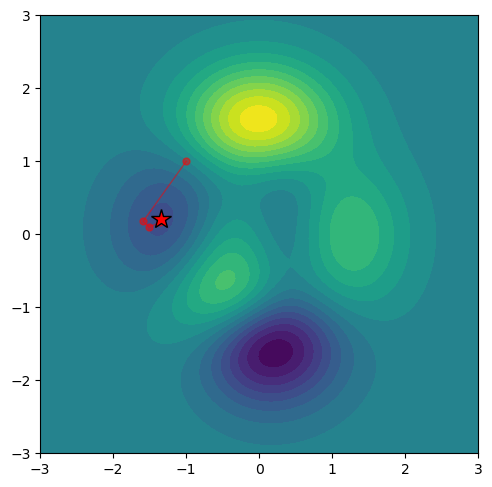

In [7]:
x_set = {}
x_set["iter_0"] = x_ini.squeeze()
iter_num = 1


# 定义回调函数
def callback(xk):
    global iter_num
    x_set[f"iter_{iter_num}"] = xk  
    iter_num += 1


kwargs = {"gtol": 1e-15, "disp": True}  # "maxiter": 10000,

x = minimize(
    func,
    x_ini.squeeze(),
    method="bfgs",  # cg bfgs tnc(truncated Newton) slsqp l-bfgs-b
    jac=func_grad,
    options=kwargs,
    callback=callback,
)["x"]

fig, ax = plot_result(x_set)

In [8]:
from neal import SimulatedAnnealingSampler
from dwave.system import DWaveSampler
from core.QUBO_solvers import IterSampleSolver
from tqdm import tqdm

/Volumes/Samsung_T5/My_Research/2_My_Articles/Quantum annealing Seismic forward modeling operator/JGR_MLC论文修改意见/最终提交内容/code/core/QUBO_solvers.py:194: UserWarning: 'postprocess' indicates whether to optimize the result after sampler finish its work. Default method is 'SteepestDescentSolver'.
  warnings.warn(
/Volumes/Samsung_T5/My_Research/2_My_Articles/Quantum annealing Seismic forward modeling operator/JGR_MLC论文修改意见/最终提交内容/code/core/QUBO_solvers.py:654: UserWarning: 'codingMod' indicates the way bit string to represent a number! It contain three mod, 'p', 'n', 'pn' If not specified, the default Settings will be used
  warnings.warn(
100%|██████████| 20/20 [00:00<00:00, 136.34it/s]


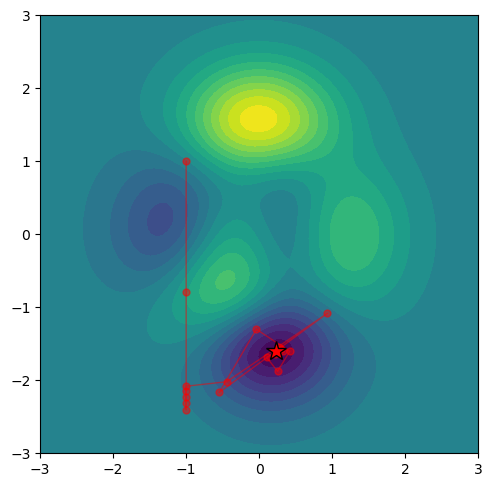

In [9]:
# Using the real Quantum Annealing Hardware Dwave System!
# You should sign up a count and get your API.
# sampler = DWaveSampler(
#     token="YOUR API TOKEN",
#     solver="Advantage_system6.4",
#     region="na-west-1",
# )  #

# Using your computer to simulate the quantum annealing.
sampler = SimulatedAnnealingSampler()  # for test

sis = IterSampleSolver(
    sampler=sampler,
    x0=np.array([[0],[0]]),  # initial vector of Delta x
    num_sample=100,  # for real hardware device using 2000
    R=2,
    fixed_point=1,
    maxiter=2,  # max iteration in small iteration
    code_method="pn",
    resultMod="lowest_energy",
)

x_set = {}
x0 = np.copy(x_ini)
alpha = 3.0
for i in tqdm(range(20)):
    x_set[f"iter_{i}"] = x0.squeeze()
    f0 = func(x0)
    g0 = func_grad(x0)

    # gradient descent
    x1 = x0 - 0.05 * g0

    hess0 = func_hess(x0) + 10.0 * np.eye(2)  # with Levenberg-Marquardt correction
    # delta_x = np.linalg.solve(hess0, -g0) # normal solver
    delta_x = sis.solve(hess0, -g0) # QA solver
    x1 = x0 + alpha * delta_x

    alpha *= 0.9
    x1 = np.clip(x1, -3.0, 3.0)
    x0 = x1

fig, ax = plot_result(x_set)